# EDA on IPL Dataset

IPL Overview
The Indian Premier League (IPL) is a men's Twenty20 (T20) cricket league that is annually held in India and contested by ten city-based franchise teams.The IPL is the most-popular cricket league in the world; in 2014, it was ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event to be broadcast live on YouTube.

According to BCCI, the 2015 IPL season contributed ₹1,150 crore (US 140 million dollars) to the GDP of the economy of India. According to a report by consulting firm D & P Advisory, In December 2022, the IPL became a decacorn valued at 10.9 Billion dollars, registering a 75percent growth in dollar terms since 2020 when it was valued at 6.2 billion dollars. IPL 2023 final was the most streamed live event on internet with 3.2 Cr viewers.

In the following nb, I have performed Exploratory Data Analysis on IPL Dataset.
###### Necessary columns used from the Dataset :
season: consists the year when the tournament was held.

city: consists the city where the matches were played.

team1 & team2: consists both the teams of each matches

toss_winner: consists the name of the team who won the toss

result: consists the result of the match

dl_applied: consists whether Duckworth-Lewis method was applied to a match or not

winner: consists Winner of the match

win_by_runs and win_by_wickets: consists winning stats

player_of_match: consists MOM info

venue: consists the name of stadiums where matches were played

### Analysis

This includes the Analysis on Match informations,Team Statistics,City and Venue details, Toss decision to field or bat,effect of toss on the outcome of the match, Match results etc.

- No of Matches played in each season
- No of Matches played in each city and Venue
- No of Matches won by each team in total and in each season
- Toss wins and Toss decisions
- No of Matches where Duckworth-Lewis was applied
- Match results (Normal/Tie)
- Player of the Match Award

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [180]:
df=pd.read_excel(r"matches.xlsx")

In [181]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


##### Shape of the column

In [182]:
df.shape

(636, 18)

In [ ]:
`

##### Check column names

In [183]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

##### Get information about the Dataset

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               636 non-null    int64         
 1   season           636 non-null    int64         
 2   city             629 non-null    object        
 3   date             636 non-null    datetime64[ns]
 4   team1            636 non-null    object        
 5   team2            636 non-null    object        
 6   toss_winner      636 non-null    object        
 7   toss_decision    636 non-null    object        
 8   result           636 non-null    object        
 9   dl_applied       636 non-null    int64         
 10  winner           633 non-null    object        
 11  win_by_runs      636 non-null    int64         
 12  win_by_wickets   636 non-null    int64         
 13  player_of_match  633 non-null    object        
 14  venue            636 non-null    object   

## Data Preparation and Cleaning

##### Checking for Null Values

In [185]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [186]:
df.isnull().mean()*100

id                   0.000000
season               0.000000
city                 1.100629
date                 0.000000
team1                0.000000
team2                0.000000
toss_winner          0.000000
toss_decision        0.000000
result               0.000000
dl_applied           0.000000
winner               0.471698
win_by_runs          0.000000
win_by_wickets       0.000000
player_of_match      0.471698
venue                0.000000
umpire1              0.157233
umpire2              0.157233
umpire3            100.000000
dtype: float64

Columns like id, date,umpire1,umpire2 and umpire3 can be dropped as they are unnecessary for the analysis.

The columns having some null values can be handled by dropping rows.

##### Dropping Null values and Unnecesaary columns

In [187]:
# Dropping unnecessary columns
df.drop(["id","date","umpire1","umpire2","umpire3"],axis=1,inplace=True)

In [188]:
# Dropping rows with null values
df.dropna(subset = ["city","winner","player_of_match"],inplace = True)

In [189]:
# Confirming that there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 635
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           626 non-null    int64 
 1   city             626 non-null    object
 2   team1            626 non-null    object
 3   team2            626 non-null    object
 4   toss_winner      626 non-null    object
 5   toss_decision    626 non-null    object
 6   result           626 non-null    object
 7   dl_applied       626 non-null    int64 
 8   winner           626 non-null    object
 9   win_by_runs      626 non-null    int64 
 10  win_by_wickets   626 non-null    int64 
 11  player_of_match  626 non-null    object
 12  venue            626 non-null    object
dtypes: int64(4), object(9)
memory usage: 68.5+ KB


##### Checking column names

In [190]:
df.columns

Index(['season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'venue'],
      dtype='object')

## Exploratory Analysis

### Number of matches in each season

In [151]:
No_of_matches=pd.DataFrame({"Year" : df.season.value_counts().index, "Matches" : df.season.value_counts().values})
No_of_matches

,Year,Matches
0,2013,76
1,2012,74
2,2011,72
3,2010,60
4,2016,60
5,2017,59
6,2008,58
7,2009,57
8,2015,57
9,2014,53


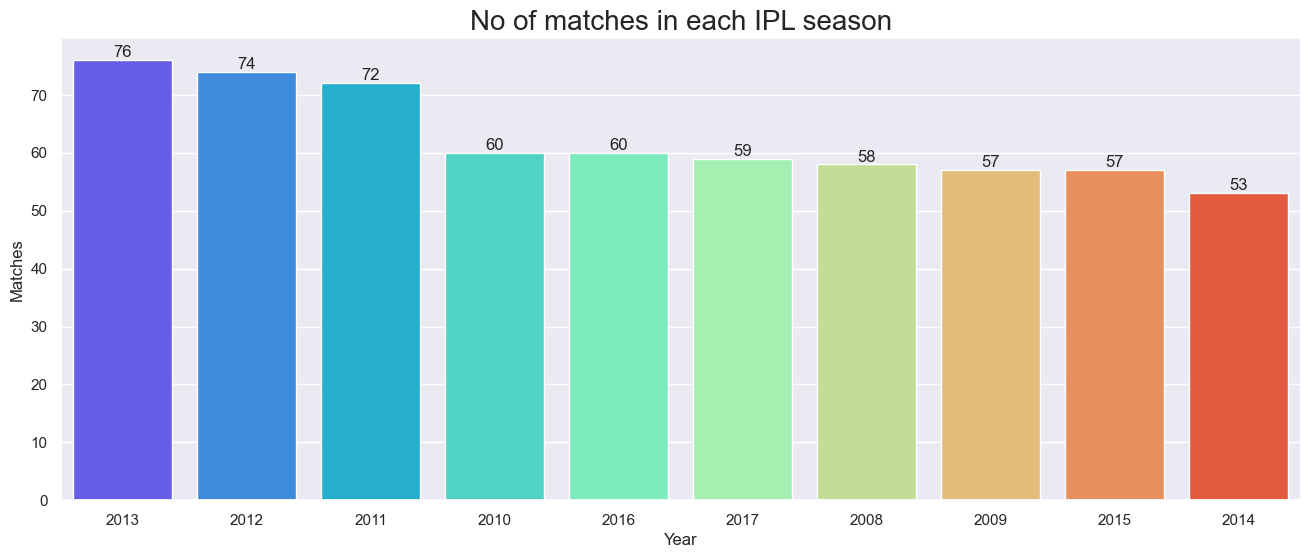

In [152]:
plt.figure(figsize=(16,6),dpi=100)
ax=sns.barplot(x="Year",y="Matches",data=No_of_matches,order= No_of_matches["Year"],palette="rainbow")
for i in ax.containers:
    ax.bar_label(i)
plt.title("No of matches in each IPL season",fontsize=20)
plt.show()

### Number of matches played in each city

In [153]:
city=df.city.value_counts()
city

Mumbai            85
Bangalore         64
Kolkata           61
Delhi             59
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Ranchi             7
Port Elizabeth     7
Cuttack            7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: city, dtype: int64

 ### Cities where No of matches held is more than 30

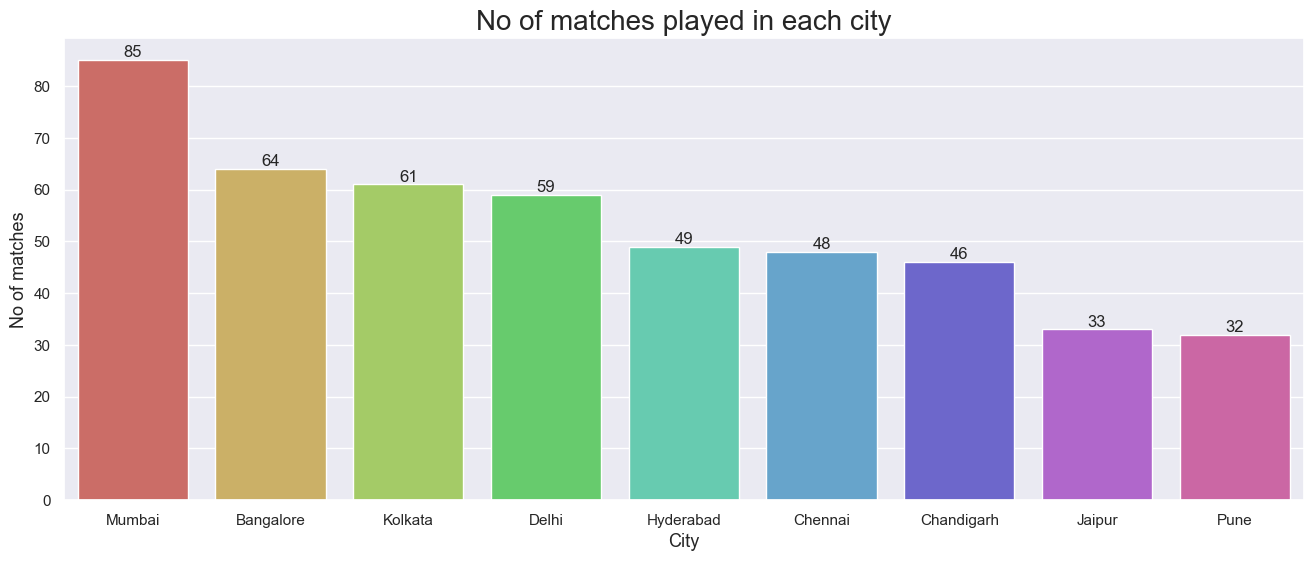

In [154]:
plt.figure(figsize=(16,6),dpi=100)
ax=sns.barplot(x=city[city>=30].index,y=city[city>=30].values,palette="hls")
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("City",fontsize=13)
plt.ylabel("No of matches",fontsize=13)
plt.title("No of matches played in each city",fontsize=20)    
plt.show()

### No of matches played in each venue

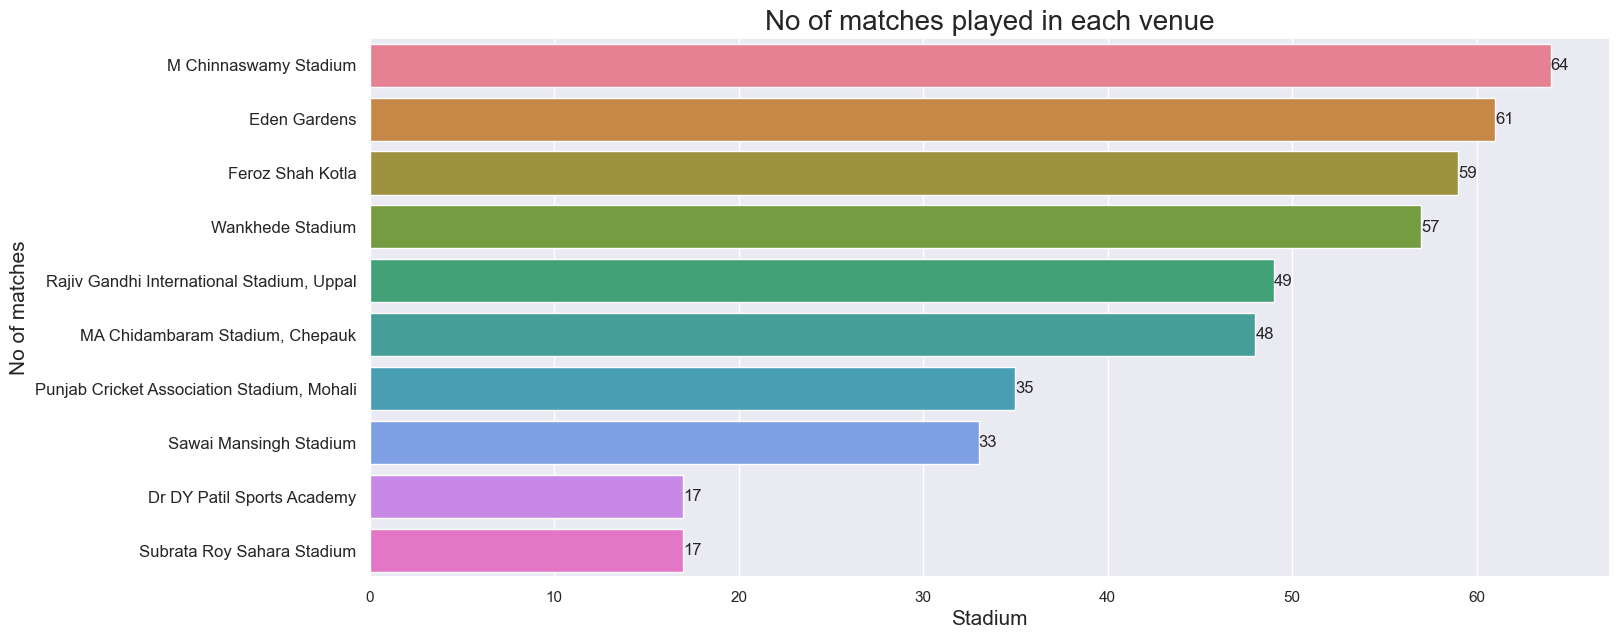

In [250]:
plt.figure(figsize=(16,7),dpi=100)
ax=sns.barplot(y=df["venue"].value_counts()[:10].index,x=df["venue"].value_counts()[:10].values,palette="husl")
for i in ax.containers:
    ax.bar_label(i)
plt.yticks(fontsize=12)
plt.xlabel("Stadium",fontsize=15)
plt.ylabel("No of matches",fontsize=15)
plt.title("No of matches played in each venue",fontsize=20)
plt.show()

### No of matches won by each team

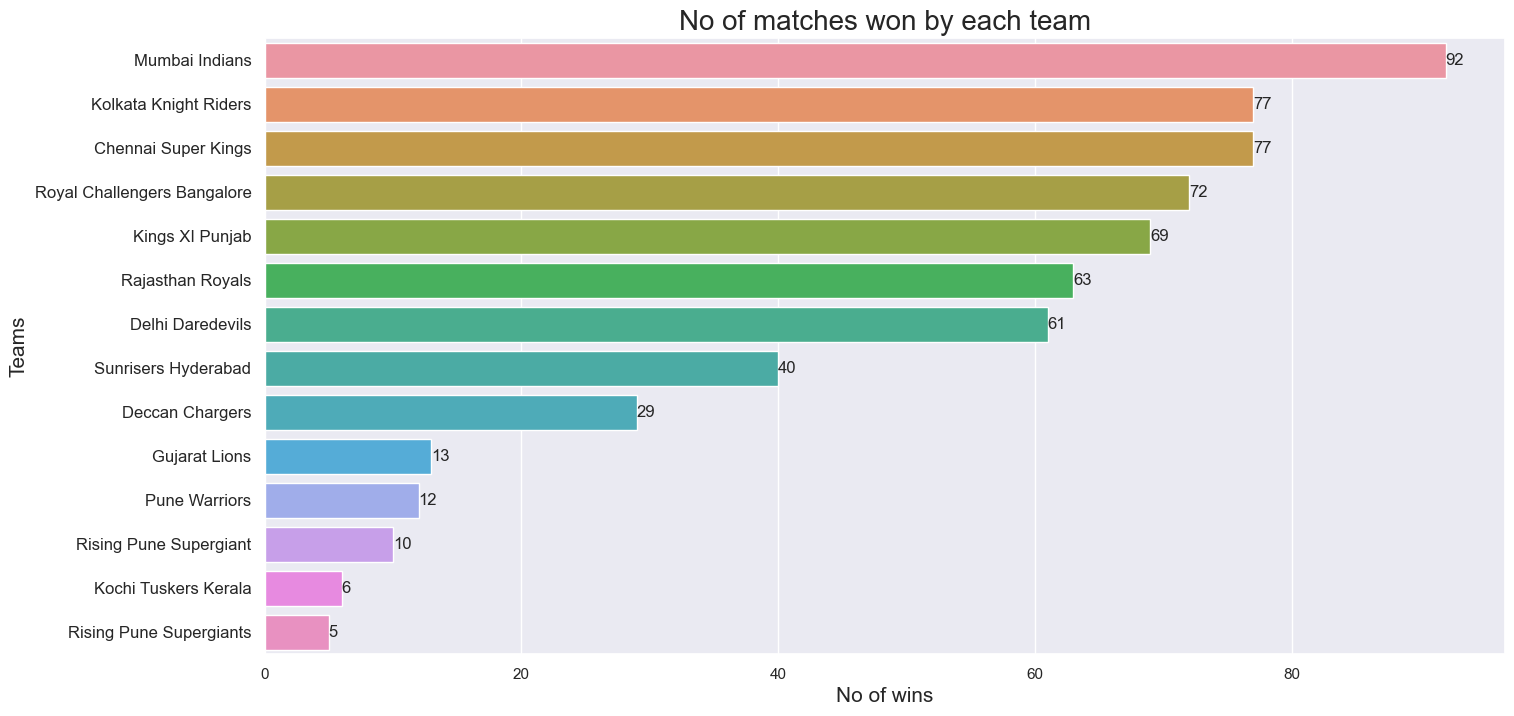

In [251]:
plt.figure(figsize=(16,8),dpi=100)
ax=sns.countplot (y="winner",data=df,order=df["winner"].value_counts().index)
for i in ax.containers:
    ax.bar_label(i)
plt.yticks(fontsize=12)
plt.xlabel("No of wins",fontsize=15)
plt.ylabel("Teams",fontsize=15)
plt.title("No of matches won by each team",fontsize=20)
plt.show()

### No of matches won by each team in each season

In [157]:
def bar_plot(year):
    return sns.barplot(y=df[df.season==year]["winner"].value_counts().index,
                          x=df[df.season==year]["winner"].value_counts().values,
                          palette="gist_heat")

In [252]:
# To remove warnings
import warnings
warnings.filterwarnings('ignore')

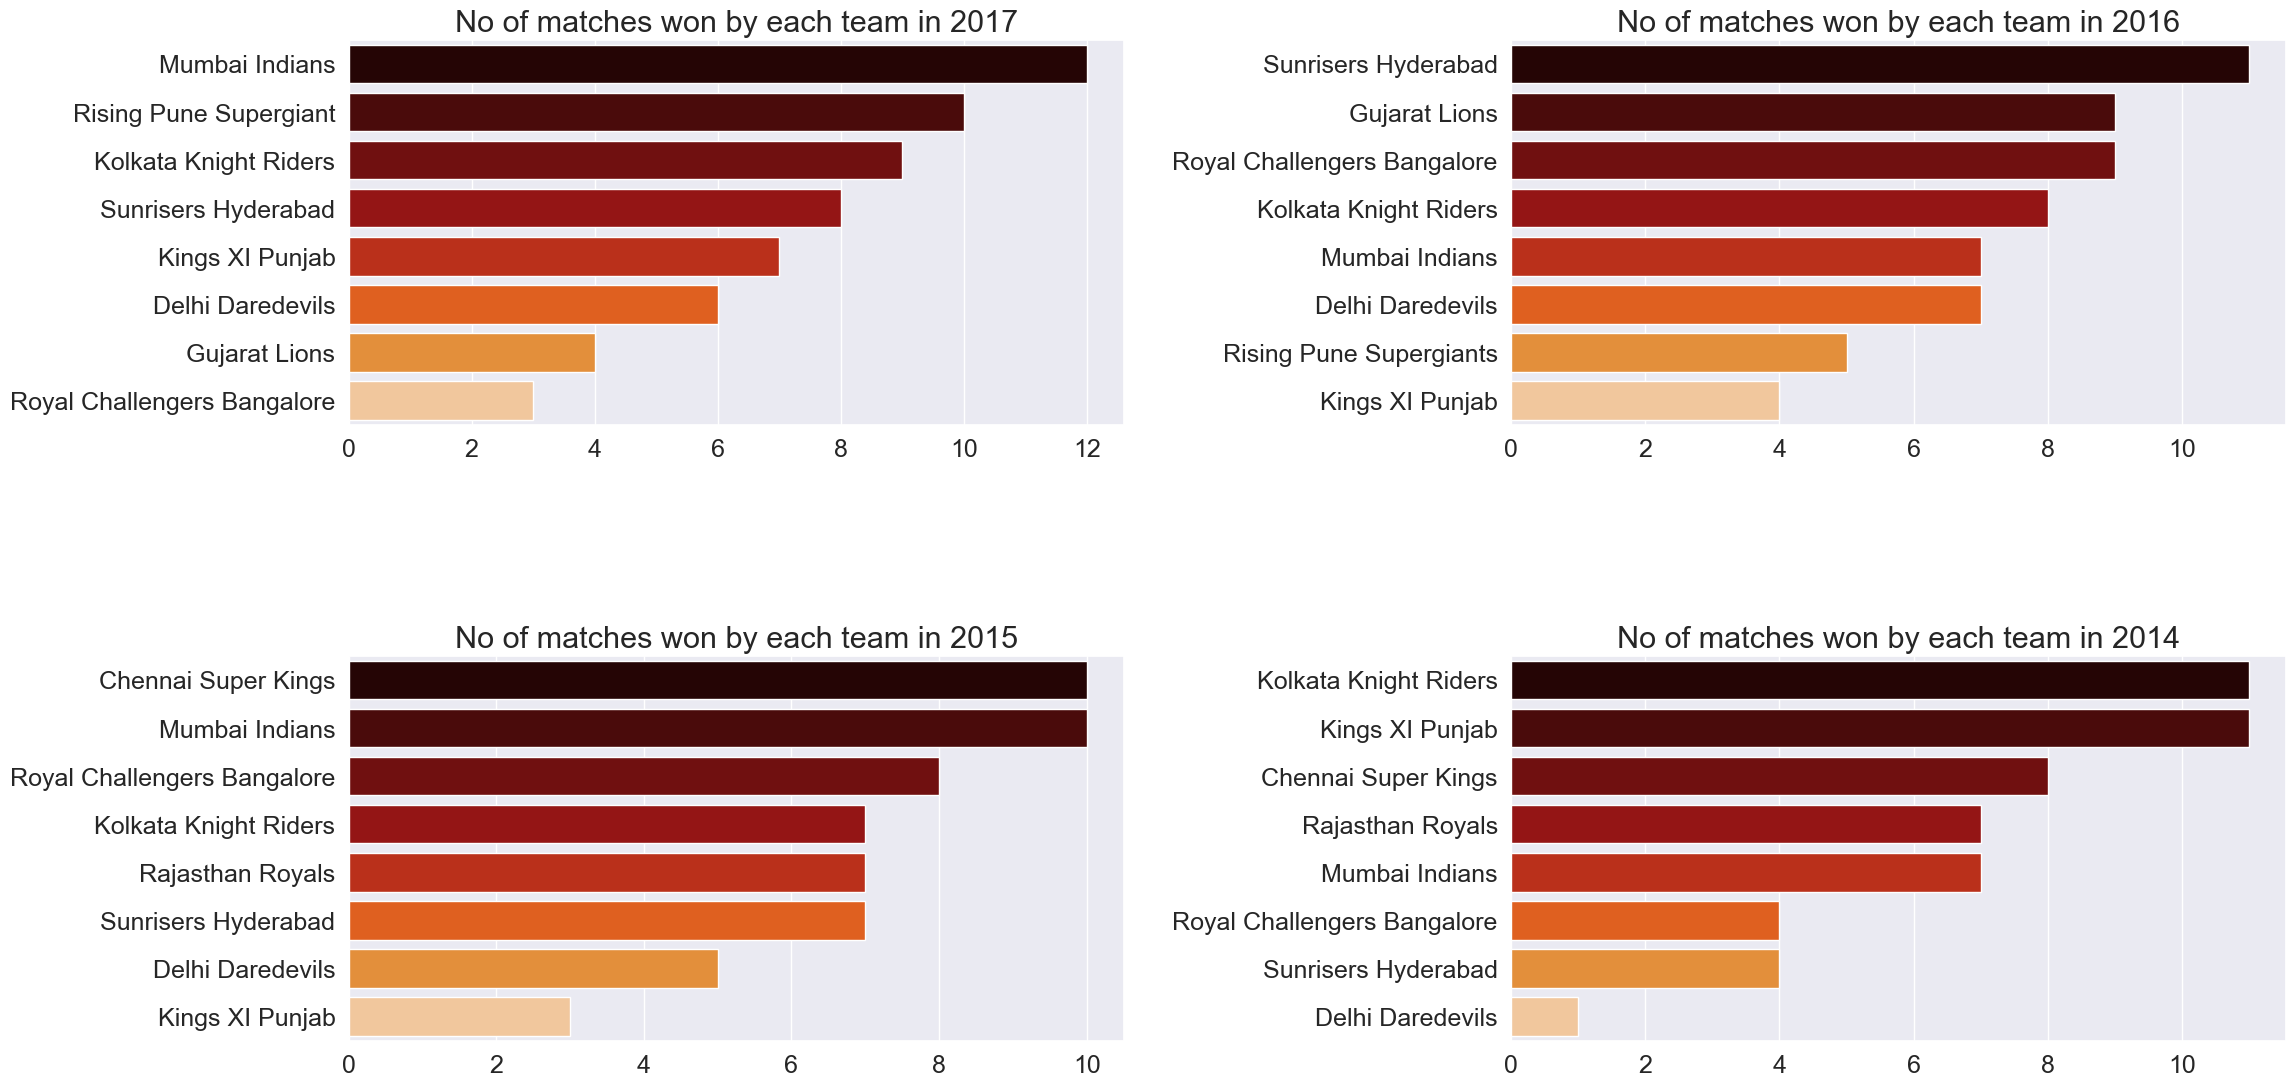

In [256]:
# No of matches won by each team in the year 2017,2016,2015,2014
# Latest first

sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(6,6, figsize=(25, 13))

plt.subplot(221)
ax=bar_plot(2017)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("No of matches won by each team in 2017",fontsize=22)

plt.subplot(222)
ax=bar_plot(2016)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("No of matches won by each team in 2016",fontsize=22)

plt.subplot(223)
ax=bar_plot(2015)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("No of matches won by each team in 2015",fontsize=22)

plt.subplot(224)
ax=bar_plot(2014)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("No of matches won by each team in 2014",fontsize=22)

plt.subplots_adjust(hspace=0.6,wspace=0.5)

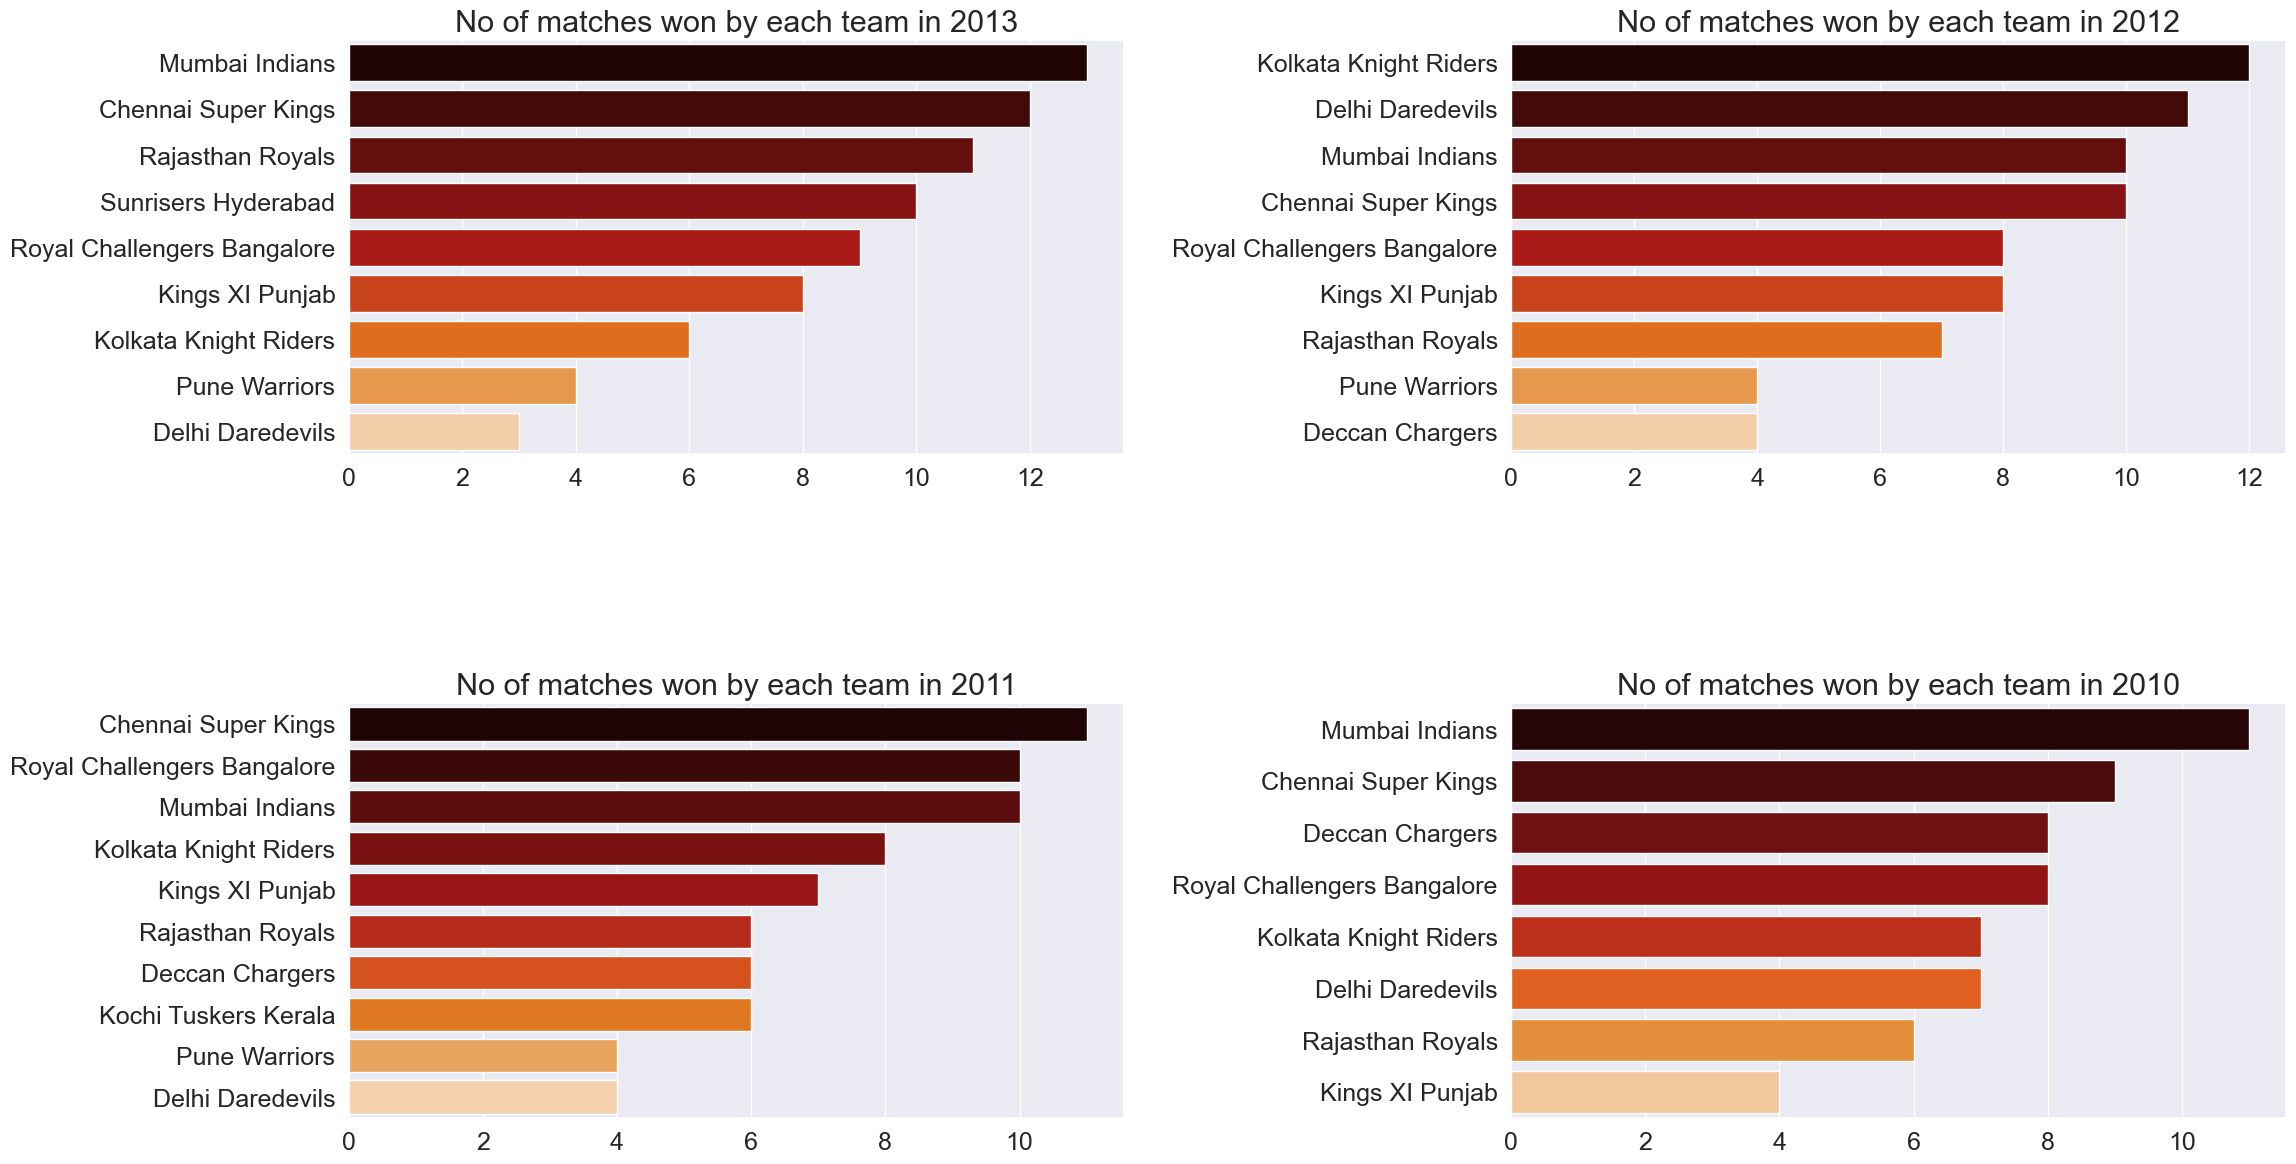

In [257]:
# No of Matches won by each team in the year 2013,2012,2011,2010

sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(6,6, figsize=(25, 14))

plt.subplot(221)
bar_plot(2013)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("No of matches won by each team in 2013",fontsize=22)

plt.subplot(222)
bar_plot(2012)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("No of matches won by each team in 2012",fontsize=22)

plt.subplot(223)
bar_plot(2011)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("No of matches won by each team in 2011",fontsize=22)

plt.subplot(224)
bar_plot(2010)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("No of matches won by each team in 2010",fontsize=22)

plt.subplots_adjust(hspace=0.6,wspace=0.5)

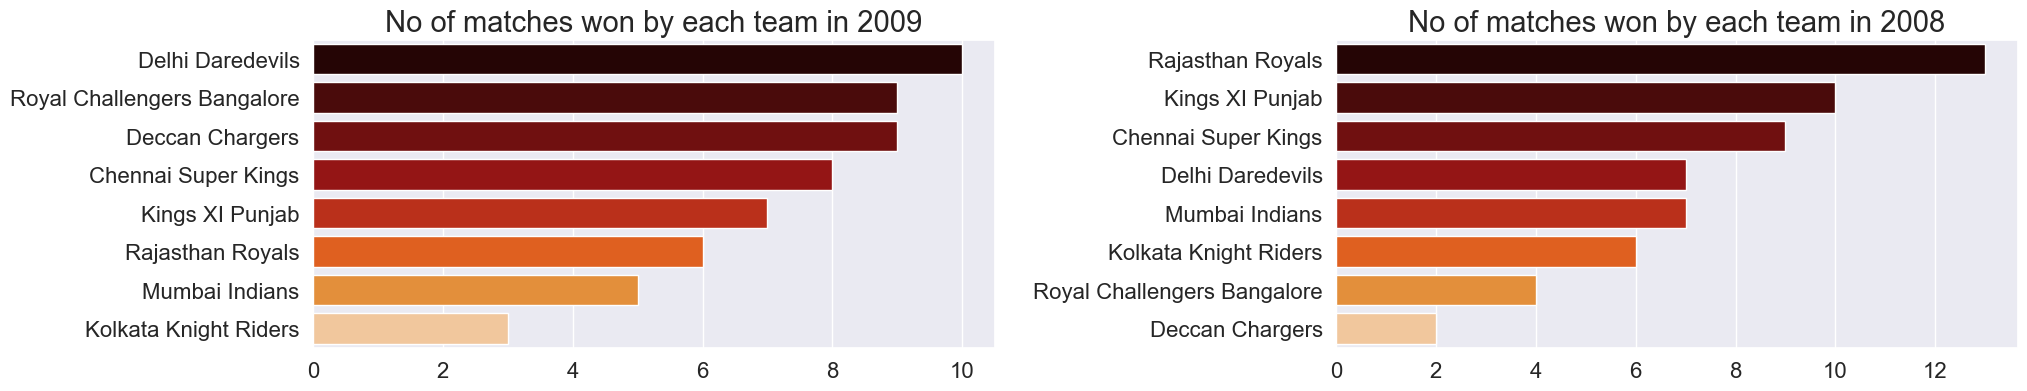

In [258]:
# No of Matches won by each team in the year 2009, 2008
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(6,6, figsize=(22, 4))
plt.subplot(121)
bar_plot(2009)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("No of matches won by each team in 2009",fontsize=21)

plt.subplot(122)
bar_plot(2008)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("No of matches won by each team in 2008",fontsize=21)

plt.subplots_adjust(hspace=0.5,wspace=0.5)

### Win by Runs Stats

In [194]:
batting_first=df[df['win_by_runs']!=0]

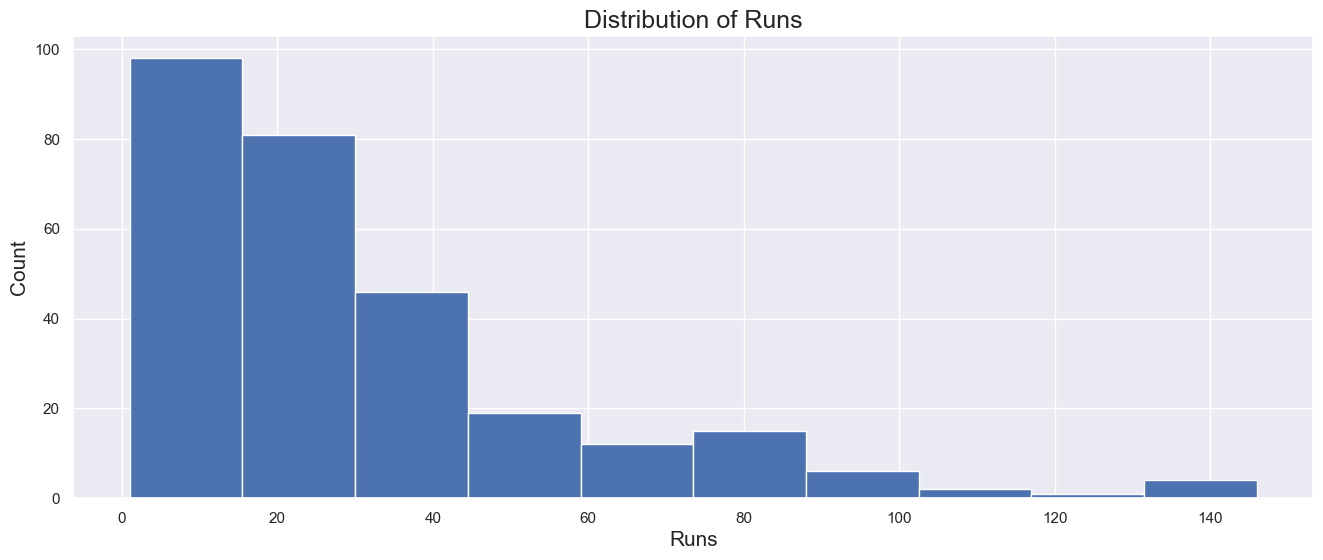

In [240]:
#creating plot of Win_by_runs
plt.figure(figsize=(16,6))
plt.hist(batting_first['win_by_runs'])
plt.title('Distribution of Runs',fontsize=18)
plt.xlabel('Runs',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [205]:
# No of wins of Each Team After Batting First
batting_first['winner'].value_counts()

Mumbai Indians                 47
Chennai Super Kings            45
Kings XI Punjab                32
Kolkata Knight Riders          31
Royal Challengers Bangalore    30
Rajasthan Royals               23
Sunrisers Hyderabad            21
Delhi Daredevils               21
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

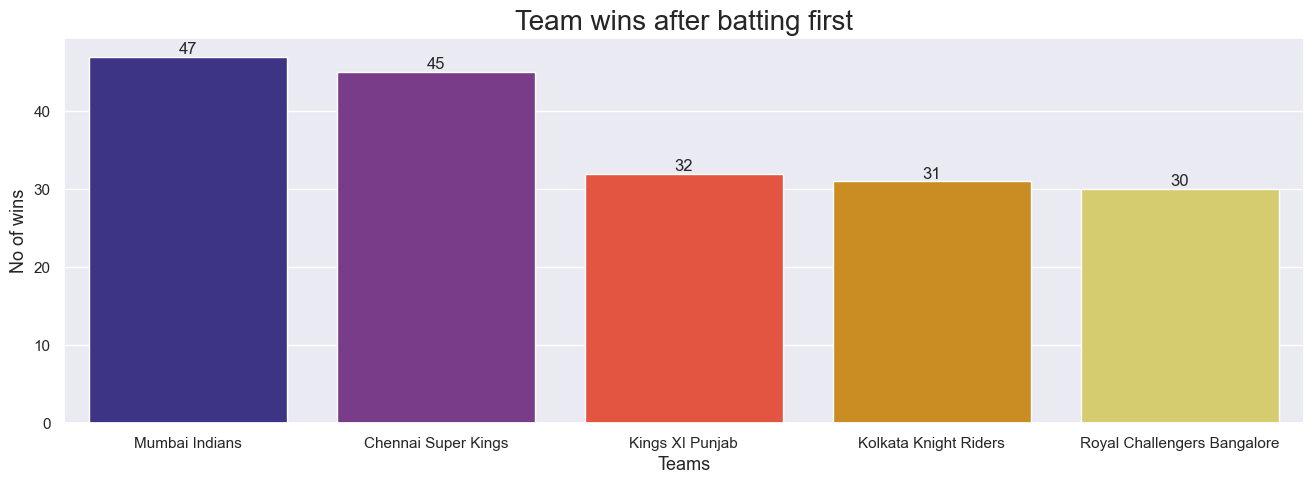

In [245]:
# Top 5 Teams Wins After Batting First
plt.figure(figsize=(16,5),dpi=100)
ax=sns.barplot(x=batting_first['winner'].value_counts()[0:5].index,y=batting_first['winner'].value_counts()[0:5],palette="CMRmap")
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Teams",fontsize=13)
plt.ylabel("No of wins",fontsize=13)
plt.title("Team wins after batting first",fontsize=20)
plt.show()

### Win by wickets stats

In [207]:
# No of wins of Each Team After Batting second
batting_second=df[df["win_by_wickets"]!=0]

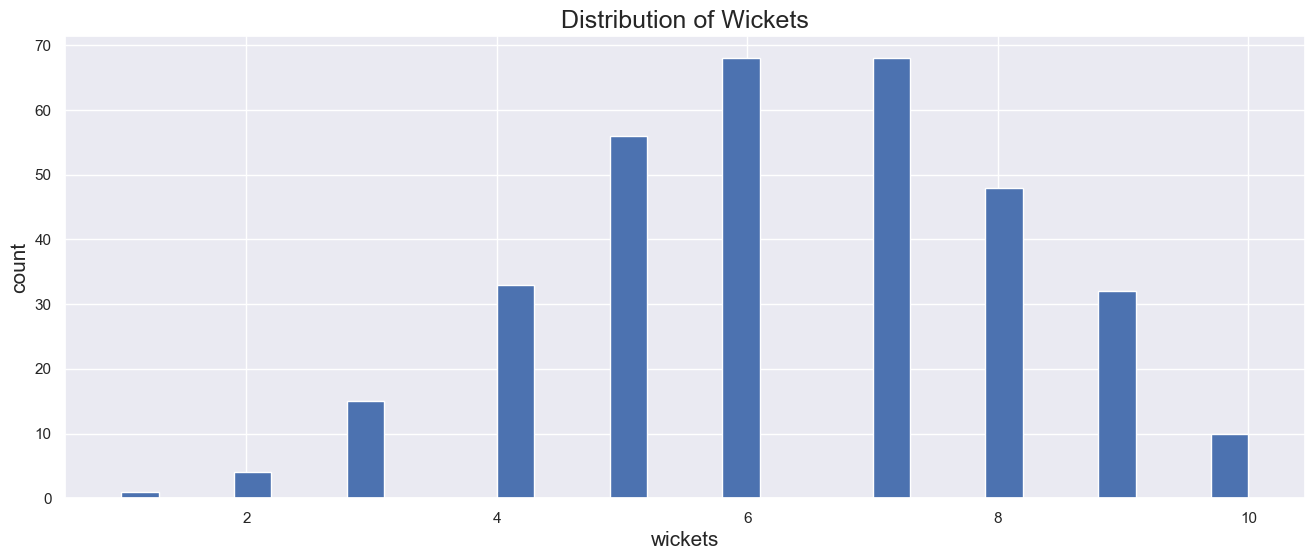

In [241]:
# creating plot of win by No. of Wickets
plt.figure(figsize=(16,6))
plt.hist(batting_second["win_by_wickets"],bins=30)
plt.title("Distribution of Wickets",fontsize=18)
plt.xlabel("wickets",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.show()

In [215]:
# No of wins of each time after batting second
batting_second['winner'].value_counts()

Kolkata Knight Riders          46
Mumbai Indians                 44
Royal Challengers Bangalore    41
Delhi Daredevils               40
Rajasthan Royals               38
Kings XI Punjab                35
Chennai Super Kings            32
Sunrisers Hyderabad            18
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

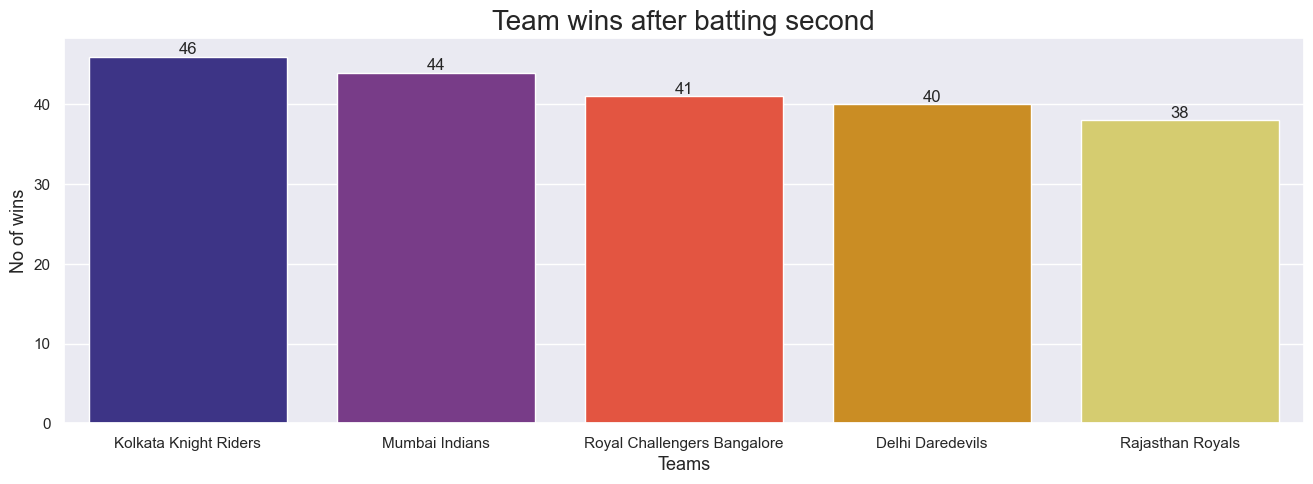

In [244]:
# Top 5 Teams Wins After Batting second
plt.figure(figsize=(16,5),dpi=100)
ax=sns.barplot(x=batting_second['winner'].value_counts()[0:5].index,y=batting_second['winner'].value_counts()[0:5],palette="CMRmap")
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Teams",fontsize=13)
plt.ylabel("No of wins",fontsize=13)
plt.title("Team wins after batting second",fontsize=20)
plt.show()

### Toss wins by each team

In [161]:
df.toss_winner.value_counts()

Mumbai Indians                 83
Kolkata Knight Riders          77
Delhi Daredevils               71
Royal Challengers Bangalore    68
Kings XI Punjab                67
Chennai Super Kings            66
Rajasthan Royals               61
Deccan Chargers                43
Sunrisers Hyderabad            34
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

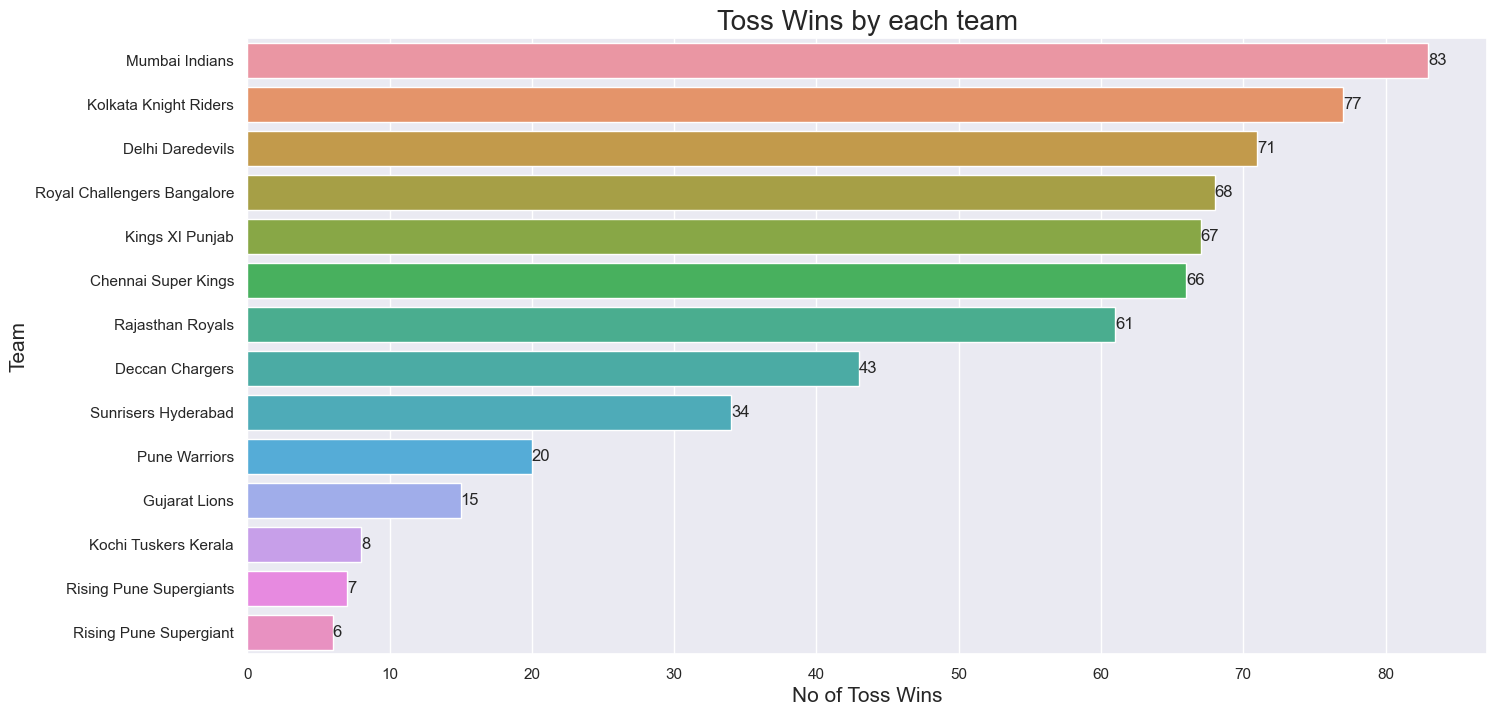

In [162]:
plt.figure(figsize=(16,8),dpi=100)
ax=sns.barplot(y=df.toss_winner.value_counts().index,x=df.toss_winner.value_counts().values)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("No of Toss Wins",fontsize=15)
plt.ylabel("Team",fontsize=15)
plt.title("Toss Wins by each team",fontsize=20)
plt.show()

### Toss Decision (Bat / Field)

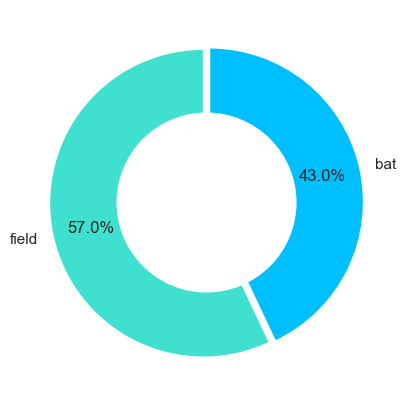

In [242]:
plt.figure(figsize=(10,5))
plt.pie(df.toss_decision.value_counts(),
        labels=df.toss_decision.value_counts().index,
        colors = ['turquoise','deepskyblue'],
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.75,
        explode = (0.02,0.02))
# Adding white circle
circle=plt.Circle((0,0),0.58,fc='white')
fig=plt.gcf()
fig.gca().add_artist(circle)

### Toss Decision (Bat/Field) in each IPL season

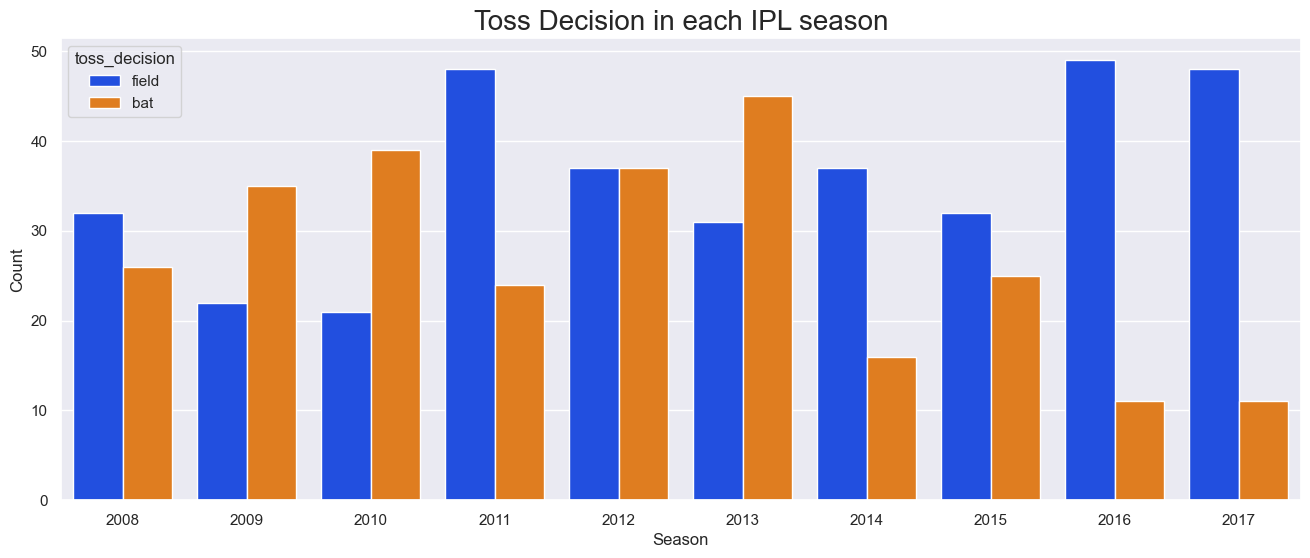

In [243]:
plt.figure(figsize=(16,6),dpi=100)
sns.countplot(x="season",data=df,hue="toss_decision",
              order=df["season"].value_counts().index.sort_values(),
              palette="bright")
plt.xlabel("Season",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Toss Decision in each IPL season",fontsize=20)
plt.show()

### Different scenerio for Match outcomes

#### Is Toss winner also the Match winner ?

In [166]:
# import plotly.io as pio

In [167]:
# pio.renderers.default="notebook"

In [168]:
same_team=df[df["toss_winner"] == df["winner"]]
diff_team=df[df["toss_winner"] != df["winner"]]
print("Toss winner has won the match",round(same_team.shape[0]/df.shape[0],2)*100)
print("Toss winner has lost the match",round(diff_team.shape[0]/df.shape[0],2)*100)

Toss winner has won the match 51.0
Toss winner has lost the match 49.0


In [169]:
res=pd.DataFrame({'result':['Yes','No'],'outcome':[same_team.shape[0], diff_team.shape[0]] })
res

,result,outcome
0,Yes,322
1,No,304


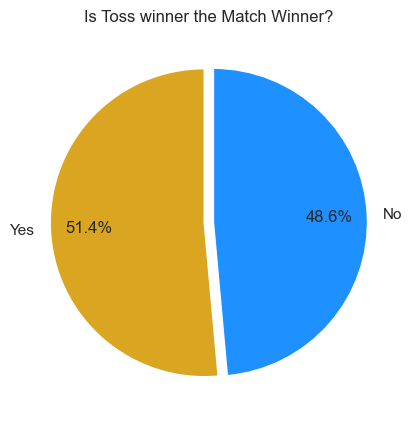

In [170]:
fig = plt.figure(figsize =(10, 5))
plt.pie(res["outcome"], labels = res["result"], 
        colors = ["goldenrod","dodgerblue"],
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.75,
        explode = (0.03,0.03))
plt.title("Is Toss winner the Match Winner?")
plt.show()

#### Matches where DL is applied

In [171]:
DL_applied=df[df["dl_applied"]==1]
DL_not_applied=df[df["dl_applied"]==0]
print("Percentage of matches where DL is applied",round(DL_applied.shape[0]/df.shape[0],2)*100)
print("Percentage of matches where DL is not applied",round(DL_not_applied.shape[0]/df.shape[0],2)*100)

Percentage of matches where DL is applied 3.0
Percentage of matches where DL is not applied 97.0


In [259]:
res2=pd.DataFrame({"DL":["Yes","No"],"DL_outcome":[DL_applied.shape[0],DL_not_applied.shape[0]]})

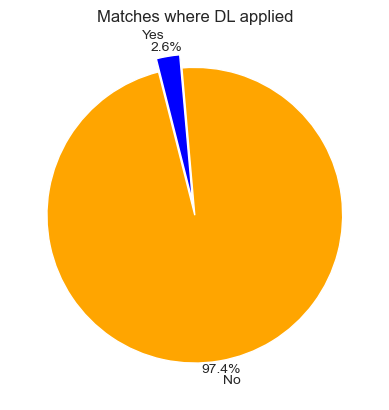

In [173]:
fig2, ax2 = plt.subplots()
ax2.pie(res2["DL_outcome"], labels=res2["DL"], colors=["blue","orange"],
        autopct='%1.1f%%', startangle=95, pctdistance=1.06,labeldistance=1.14,
        textprops={'fontsize': 10},explode=[0.09,0])
plt.title("Matches where DL applied")
plt.show()

#### Match Results

In [174]:
df["result"].value_counts()

normal    619
tie         7
Name: result, dtype: int64

In [261]:
Normal=df[df["result"]=="normal"]
Tie=df[df["result"]=="tie"]
print("Percentage of matches where result is normal",round(Normal.shape[0]/df.shape[0],2)*100)
print("Percentage of matches where result is tie",round(Tie.shape[0]/df.shape[0],2)*100)
res3=pd.DataFrame({"Result":["Normal","Tie"],"match_res":[Normal.shape[0],Tie.shape[0]]})

Percentage of matches where result is normal 99.0
Percentage of matches where result is tie 1.0


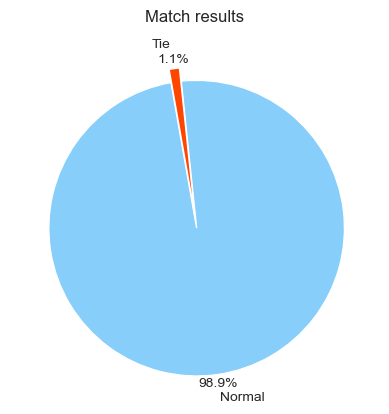

In [262]:
fig3, ax3 = plt.subplots()
ax3.pie(res3["match_res"], labels=res3["Result"], colors=["lightskyblue","orangered"],
        autopct='%1.1f%%', startangle=100, pctdistance=1.06,labeldistance=1.16,
        textprops={'fontsize': 10},explode=[0.09,0])
plt.title("Match results")
plt.show()

### Player of the match

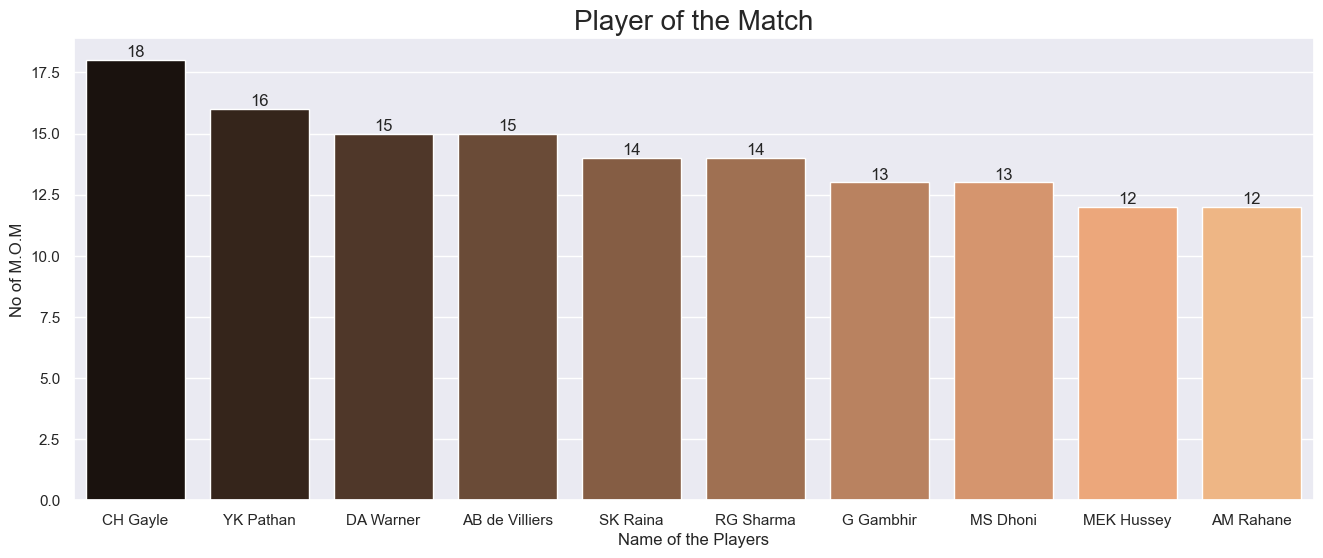

In [178]:
plt.figure(figsize=(16,6),dpi=100)
ax=sns.barplot(x=df["player_of_match"].value_counts()[:10].index,y=df["player_of_match"].value_counts()[:10].values,
               palette="copper")
for i in ax.containers:
    ax.bar_label(i)

plt.xlabel("Name of the Players",fontsize=12)
plt.ylabel("No of M.O.M",fontsize=12)
plt.title("Player of the Match",fontsize=20)

plt.show()

## Conclusion

From the Analysis It has been found that Most no of matches were played in the year 2013 whereas In Mumbai Most of the matches were played but M Chinnaswamy stadium,Bangalore was the venue for most of the matches.

Mumbai Indians won the most number of matches (92) followed by Kolkata Knight Riders (77) and Chennai Super Kings (77) between the year 2008-2017.

Mumbai Indians has won most matches when batted first (47) followed by Chennai Super Kings (45).
Kolkata Knight Riders has won the most matches when batted second (46) followed by Mumbai Indians (44).

Mumbai Indians has also won more tosses (83) followed by Kolkata Knight Riders (77).

It also has been found that Toss winning team prefered fielding over batting. Field (57%) and Bat (43%). Also 2016 was the year when most of the teams chose to field. 

The Match winning percentage of Toss winning teams were 51% and for only 2.5% of matches the DL Rule was applied due to bad weather conditions and also the Match was ended as a tie for 1.12% of total matches.

Chris Gayle is the most awarded Player of the match (18)